<a href="https://colab.research.google.com/github/bluenose97/rubaclava/blob/master/L4_AnalyzingProductSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting sentiment from product reviews

#Fire up GraphLab Create

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#pip install --upgrade --no-cache-dir https://get.graphlab.com/GraphLab-Create/2.1/yuliya.karpievitch@uwa.edu.au/B432-855C-1247-4049-31BB-E8FB-8E59-FA76/GraphLab-Create-License.tar.gz
!pip install turicreate

In [0]:
# import graphlab
# Library has been renamed:
# https://apple.github.io/turicreate/docs/api/index.html
import turicreate

#Read some product review data

Loading reviews for a set of baby products. 

In [0]:
# products = graphlab.SFrame(')

products = turicreate.SFrame('/content/drive/My Drive/amazon_baby.gl/') 

In [0]:
from string import punctuation
from collections import Counter

# Added delimiters to ignore punctuation

In [0]:
# add another column: 'word_count' - will tockenize the 'review'
products['word_count'] = turicreate.text_analytics.count_words(products['review'], to_lower=True, delimiters=["\r", "\v", "\n", "\f", "\t", " ", "!", "#", "$", "%", "&", "(", ")", "*", "+", ",", "-", ".", "/", ":", ";", "<", "=", ">", "?", "@", "[", "\\", "]", "^", "_", "`", "{", "|", "}", "~", " "])

In [7]:
# data had 3 columns, we added one more 
products.head()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|    Planetwise Flannel Wipes   | These flannel wipes are OK... |  3.0   |
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+
|           word_count          |
+-------------------------------+
| {'handles': 1, 'stripping'... |
| {'recommend': 1, 'highly':... |
| {'quilt': 1, 'of': 1, 'the... |
| {'tool': 1, 'clever': 1, '... |
| {'rock': 1, 'many': 1, 'he... |
| {'thumb': 1, 'or': 1, 'bre... |
| {'for': 1, 'barnes': 1, 'a... |
| {'right': 1, 'because': 1,... |
| {'like': 1, 'and': 1, 'cha... |
| {'in': 1, 'pages': 1, 'out... |
+-------------------------------+
[10 rows x 4 columns]

In [8]:
len(products['name']) # how many reviews do we have?

183531

In [0]:
# graphlab.canvas.set_target('ipynb')
# 
# 'auto', 'browser', 'gui', 'none', default: 'auto'
turicreate.visualization.set_target('gui')  # 'browser')

In [10]:
products['name'].show()

Materializing SArray

#Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [0]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [12]:
len(giraffe_reviews)

785

In [13]:
giraffe_reviews['rating'].show() # (view='Categorical')
# show does not have parameters...

Materializing SArray

#Build a sentiment classifier

In [14]:
products['rating'].show() # (view='Categorical')

Materializing SArray

##Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [0]:
# ignore all 3* reviews = remove products with rating  == 3
products = products[products['rating'] != 3]

In [16]:
len(products['name'])

166752

In [0]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [18]:
products.head()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+
|           word_count          | sentiment |
+-------------------------------+-----------+
| {'recommend': 1, 'highly':... |     1     |
| {'quilt': 1, 'of': 1, 'the... |     1     |
| {'tool': 1, 'clever': 1, '... |     1     |
| {'rock': 1, 'many': 1, 'he... |     1     |
| {'thumb': 1, 'or': 1, 'bre... |     1     |
| {'for': 1, 'barnes': 1, 'a... |     1     |
| {'right': 1, 'because': 1,... |     1     |
| {'like': 1, 'and': 1, 'cha... |     1     |
| {'in': 1, 'pages': 1, 'out... |     1     |
| {'tracker': 1, 'now': 1, '... |     1     |
+-------------------------------+-----------+
[10 rows x 5 columns]

In [19]:
# cgeck if we have 0's and 1's
products['sentiment'].show()

Materializing SArray

##Let's train the sentiment classifier

In [0]:
# split data into a traning (80%) and testing (20%) data sets
train_data,test_data = products.random_split(.8, seed=0) 

In [21]:
# sentiment_model = graphlab.logistic_classifier.create(train_data,
#                                                     target='sentiment',
#                                                     features=['word_count'],
#                                                     validation_set=test_data)
sentiment_model = turicreate.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=['word_count'],
                                                     validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 66738

Number of coefficients      : 66739

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 1.826210     | 0.841421          | 0.840019            |

| 1         | 9        | 3.250000  | 2.995211     | 0.933202          | 0.909861            |

| 2         | 11       | 2.695350  | 3.552841     | 0.941678          | 0.916617            |

| 3         | 12       | 2.695350  | 3.945198     | 0.931471          | 0.901453            |

| 4         | 14       | 1.406087  | 4.509112     | 0.950490          | 0.918899            |

| 9         | 19       | 1.406087  | 6.390446     | 0.980704          | 0.916466            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

#Evaluate the sentiment model

In [0]:
logRegsRes = sentiment_model.evaluate(test_data, metric='roc_curve')

In [23]:

logRegsRes

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.0    |        1.0         |        1.0         | 27976 | 5328 |
 |   1e-05   | 0.8226351351351351 | 0.9964969974263654 | 27976 | 5328 |
 |   2e-05   | 0.8038663663663663 | 0.995960823563054  | 27976 | 5328 |
 |   3e-05   | 0.7916666666666666 | 0.9957106090935087 | 27976 | 5328 |
 |   4e-05   | 0.7849099099099099 | 0.9955318844724049 | 27976 | 5328 |
 |   5e-05   | 0.7777777777777778 | 0.9954246496997426 | 27976 | 5328 |
 |   6e-05   | 0.7727102102102102 | 0.9953174149270804 | 27976 | 5328 |
 |   7e-05   | 0.7682057057057057 | 0.9951744352301973 | 27976 | 5328 |
 |   8e-05   | 0.7648273273273273 | 0.9949957106090935 | 27976 | 5328 |
 |   9e-05   | 0.7614489489489

In [0]:
#sentiment_model.show(view='Evaluation')
# does nto work in turicreate, will use matlibplot
import matplotlib.pyplot as plt

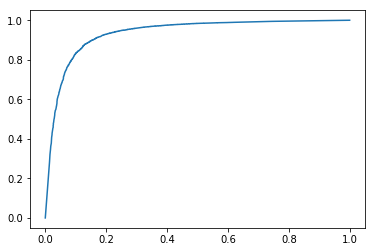

In [25]:
# plt.figure()
plt.plot(logRegsRes['roc_curve']['fpr'], logRegsRes['roc_curve']['tpr'])

#Applying the learned model to understand sentiment for Giraffe

In [0]:
# get predicted scores
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')


In [27]:
giraffe_reviews.head()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	predicted_sentiment	float

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Vulli Sophie the Giraffe T... | He likes chewing on all th... |  5.0   |
| Vulli Sophie the Giraffe T... | My son loves this toy and ... |  5.0   |
| Vulli Sophie the Giraffe T... | There really should be a l... |  1.0   |
| Vulli Sophie the Giraffe T... | All the moms in my moms' g... |  5.0   |
| Vulli Sophie the Giraffe T... | I was a little skeptical o... |  5.0   |
| Vulli Sophie the Giraffe T... | I have been reading about ... |  5.0   |
| Vulli Sophie the Giraffe T... | My neice loves her sophie ... |  5.0   |
| Vulli Sophie the Giraffe T... | What a friendly face!  And... |  5.0   |
| Vulli Sophie the Giraffe T... | We got this just for my so... |  5.0   |
| Vulli Sophie the Giraffe T... | My baby seems to like this... |  3.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+---------------------+
|           word_count          | predicted_sentiment |
+-------------------------------+---------------------+
| {'purchase': 1, 'teething'... |  0.999620044590381  |
| {'a': 1, 'is': 1, 'when': ... |  0.9999583899787935 |
| {'made': 1, 'of': 1, 'pack... | 0.34685789605166706 |
| {'another': 1, 'out': 1, '... |  0.9911110572224174 |
| {'disappointed': 1, 'will'... |  0.7740964315620129 |
| {'late': 1, 'perfect': 1, ... |  0.9999999745836359 |
| {'delight': 1, 'in': 1, 'o... |  0.9992310849086726 |
| {'inside': 1, 'water': 1, ... |  0.9999996175138745 |
| {'its': 1, 'fine': 1, 'is'... |  0.9819626374525154 |
| {'off': 1, 'have': 2, 'of'... |  0.3396385610790057 |
+-------------------------------+---------------------+
[10 rows x 5 columns]

##Sort the reviews based on the predicted sentiment and explore, hiher values on top

In [0]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [29]:
giraffe_reviews.head()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	predicted_sentiment	float

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
| Vulli Sophie the Giraffe T... | As a mother of 16month old... |  5.0   |
| Vulli Sophie the Giraffe T... | Sophie, oh Sophie, your ti... |  5.0   |
| Vulli Sophie the Giraffe T... | I'll be honest...I bought ... |  4.0   |
| Vulli Sophie the Giraffe T... | We got this little giraffe... |  5.0   |
| Vulli Sophie the Giraffe T... | As every mom knows, you al... |  5.0   |
| Vulli Sophie the Giraffe T... | I'm not sure why Sophie is... |  4.0   |
| Vulli Sophie the Giraffe T... | My 8 week old LOVES Sophie... |  5.0   |
| Vulli Sophie the Giraffe T... | Let me just start off by a... |  5.0   |
| Vulli Sophie the Giraffe T... | Sophie the Giraffe is the ... |  5.0   |
| Vulli Sophie the Giraffe T... | My 4 month old son is teet... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+---------------------+
|           word_count          | predicted_sentiment |
+-------------------------------+---------------------+
| {'will': 1, '15months': 1,... |         1.0         |
| {'11': 1, 'prisrob': 1, '1... |         1.0         |
| {'around': 1, 'explore': 1... |         1.0         |
| {'out': 1, 'would': 1, 'en... |  0.9999999999999956 |
| {'whether': 1, 'neutral': ... |  0.9999999999999921 |
| {'makers': 1, 'or': 1, 'ta... |  0.9999999999998561 |
| {'highly': 1, 'now': 1, 'i... |  0.9999999999997576 |
| {'question': 1, 'must': 1,... |  0.999999999999712  |
| {'what': 1, 'are': 1, 'hav... |  0.9999999999994444 |
| {'worth': 1, 'works': 1, '... |  0.9999999999993985 |
+-------------------------------+---------------------+
[10 rows x 5 columns]

##Most positive reviews for the giraffe

In [30]:
giraffe_reviews[0]['review']

"As a mother of 16month old twins; I bought Sophie [1 for each, of course] when they were 4 months old after careful reading of all reviews. I heard great things about Sophie and wanted to give her a try. At 4 months babies can't do much more than grasp and semi gnaw on Sophie. For many months I had to squeeze Sophie myself [which I personally enjoyed] and set it on their laps. They LOVED Sophie. The squeak is LOUD and sounds exactly like a dog's squeaky chew toy, just for those who are wondering.As they grew and their motor skills developed to each milestone, Sophie gained more and more individual babytime. The twins were able to squeeze her themselves and chew on her around the clock. They love to throw her, stretch her, squeeze her, chew on her, drool on her... you name it, they have done it. One of the two Sophie's took an extended vacation out in the back yard [unbeknownst to me] and once found, a little water had her looking like a champ again... ready to face another day of play

In [31]:
giraffe_reviews[1]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

##Show most negative reviews for giraffe

In [32]:
# -1 is the last element
giraffe_reviews[-1]['review']

"This children's toy is nostalgic and very cute. However, there is a distinct rubber smell and a very odd taste, yes I tried it, that my baby did not enjoy. Also, if it is soiled it is extremely difficult to clean as the rubber is a kind of porus material and does not clean well. The final thing is the squeaking device inside which stopped working after the first couple of days. I returned this item feeling I had overpaid for a toy that was defective and did not meet my expectations. Please do not be swayed by the cute packaging and hype surounding it as I was. One more thing, I was given a full refund from Amazon without any problem."

In [33]:
giraffe_reviews[-2]['review']

'I wanted to love this product and was excited to buy it when I became pregnant but am now hesitant to let my baby use it after reading about the recall in Europe. Apparently, as I understand it, their toxin standards of measurement are lower than ours so they have not been recalled here (apparently we are OK with low levels of nitrates in the toys our children put in their mouths, but Europeans are not...hmmm)...Be that as it may, toxins registering even CLOSE to a dangerous level made me nervous about using. After digging around online I did discover that the company claims to have changed the product after a certain date and lists manufacturing codes so you can check yours (those listed were made after a certain date and are said to be safer). Sadly mine was not made after the &#34;improved&#34; date but I could not return it because there was no formal recall in our country. I considered returning it and hunting for one with an approved manufacturing date but man that was just too 

# Count the number of occurances for each selected word

In [34]:
products.head()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+
|           word_count          | sentiment |
+-------------------------------+-----------+
| {'recommend': 1, 'highly':... |     1     |
| {'quilt': 1, 'of': 1, 'the... |     1     |
| {'tool': 1, 'clever': 1, '... |     1     |
| {'rock': 1, 'many': 1, 'he... |     1     |
| {'thumb': 1, 'or': 1, 'bre... |     1     |
| {'for': 1, 'barnes': 1, 'a... |     1     |
| {'right': 1, 'because': 1,... |     1     |
| {'like': 1, 'and': 1, 'cha... |     1     |
| {'in': 1, 'pages': 1, 'out... |     1     |
| {'tracker': 1, 'now': 1, '... |     1     |
+-------------------------------+-----------+
[10 rows x 5 columns]

In [0]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [36]:
len(products['review'])

166752

In [0]:
def word_counter(word_count, word):
    if word in word_count:
        return word_count[word]
    return 0

for word in selected_words:
  products[word] = products['word_count'].apply(lambda x : word_counter(x, word))


In [38]:
products.head()

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	awesome	int
	great	int
	fantastic	int
	amazing	int
	love	int
	horrible	int
	bad	int
	terrible	int
	awful	int
	wow	int
	hate	int

Rows: 10

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
| Stop Pacifier Sucking with... | This is a product well wor... |  5.0   |
| Stop Pacifier Sucking with... | All of my kids have cried ... |  5.0   |
| Stop Pacifier Sucking with... | When the Binky Fairy came ... |  5.0   |
| A Tale of Baby's Days with... | Lovely book, it's bound ti... |  4.0   |
| Baby Tracker&reg; - Daily ... | Perfect for new parents. W... |  5.0   |
| Baby Tracker&reg; - Daily ... | A friend of mine pinned th... |  5.0   |
| Baby Tracker&reg; - Daily ... | This has been an easy way ... |  4.0   |
| Baby Tracker&reg; - Daily ... | I love this journal and ou... |  4.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------+-------+-----------+---------+
|           word_count          | sentiment | awesome | great | fantastic | amazing |
+-------------------------------+-----------+---------+-------+-----------+---------+
| {'recommend': 1, 'highly':... |     1     |    0    |   0   |     0     |    0    |
| {'quilt': 1, 'of': 1, 'the... |     1     |    0    |   0   |     0     |    0    |
| {'tool': 1, 'clever': 1, '... |     1     |    0    |   0   |     0     |    0    |
| {'rock': 1, 'many': 1, 'he... |     1     |    0    |   1   |     0     |    0    |
| {'thumb': 1, 'or': 1, 'bre... |     1     |    0    |   1   |     0     |    0    |
| {'for': 1, 'barnes': 1, 'a... |     1     |    0    |   0   |     0     |    0    |
| {'right': 1, 'because': 1,... |     1     |    0    |   0   |     0     |    0    |
| {'like': 1, 'and': 1, 'cha... |     1     |    0    |   0   |     1     |    0    |
| {'in': 1, 'pages': 1, 'out... |     1     |    0    |   0   |     0     |    0    |
| {'tracker': 1, 'now': 1, '... |     1     |    0    |   0   |     0     |    0    |
+-------------------------------+-----------+---------+-------+-----------+---------+
+------+----------+-----+----------+-------+-----+------+
| love | horrible | bad | terrible | awful | wow | hate |
+------+----------+-----+----------+-------+-----+------+
|  1   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  2   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
|  2   |    0     |  0  |    0     |   0   |  0  |  0   |
+------+----------+-----+----------+-------+-----+------+
[10 rows x 16 columns]

In [39]:
print ("Word count value:")

for word in selected_words:
    print ('{0}: {1}'.format(word, products[word].sum()))

Word count value:
awesome: 3887
great: 55766
fantastic: 1663
amazing: 2627
love: 41941
horrible: 1108
bad: 4163
terrible: 1146
awful: 687
wow: 401
hate: 1106




# Create a new sentiment analysis model using only the selected_words as features
Just going to use the selected_words as features for the sentiment classifier:


In [0]:
train_data,test_data = products.random_split(.8, seed=0)

In [41]:
selected_words_model = turicreate.logistic_classifier.create(train_data,
                                                     target='sentiment',
                                                     features=selected_words,
                                                     validation_set=test_data)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients      : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.132479     | 0.847409          | 0.845874            |

| 2         | 3        | 0.225713     | 0.847529          | 0.846085            |

| 3         | 4        | 0.319012     | 0.847634          | 0.846115            |

| 4         | 5        | 0.414755     | 0.847708          | 0.846415            |

| 5         | 6        | 0.507117     | 0.847701          | 0.846415            |

| 6         | 7        | 0.600557     | 0.847701          | 0.846415            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [42]:
coef = selected_words_model.coefficients
coef = coef.sort('value', ascending=False)
coef

Columns:
	name	str
	index	str
	class	int
	value	float
	stderr	float

Rows: 12

Data:
+-------------+-------+-------+----------------------+----------------------+
|     name    | index | class |        value         |        stderr        |
+-------------+-------+-------+----------------------+----------------------+
|     love    |  None |   1   |  1.3625195530216048  | 0.028131751121719284 |
| (intercept) |  None |   1   |  1.3362238100926236  | 0.008927759336696596 |
|   awesome   |  None |   1   |  1.1333268988721041  | 0.08402251801203259  |
|   amazing   |  None |   1   |  1.109101458986033   | 0.09998177601480443  |
|  fantastic  |  None |   1   |  0.8857669551071381  |  0.1116850975842024  |
|    great    |  None |   1   |  0.8654209222541662  | 0.018979572378797133 |
|     wow     |  None |   1   | 0.018212249653880425 | 0.16731303708666695  |
|     bad     |  None |   1   | -0.9928838796526736  | 0.03854594659120579  |
|     hate    |  None |   1   | -1.3492352146475657  | 0.07718018681289283  |
|    awful    |  None |   1   | -2.0537140142100756  | 0.10103018899142104  |
+-------------+-------+-------+----------------------+----------------------+
[12 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

This looks accurate to me. The words on the higher end of the list would generally be associated with positive reviews, and vice versa for those at the bottom of the list.

# Compare different sentiment models

In [43]:
selected_words_model.evaluate(test_data)

{'accuracy': 0.846414845063656,
 'auc': 0.692595328922002,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  155  |
 |      0       |        0        |  368  |
 |      0       |        1        |  4960 |
 |      1       |        1        | 27821 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9158121697911352,
 'log_loss': 0.39630201541837784,
 'precision': 0.8486928403648455,
 'recall': 0.9944595367457821,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+-----+-------+------+
 | threshold |        fpr         | tpr |   p   |  n   |
 +-----------+--------------------+-----+-------+------+
 |    0.0    |        1.0         | 1.0 | 27976 | 5328

In [44]:
sentiment_model.evaluate(test_data)

{'accuracy': 0.9164664905116503,
 'auc': 0.9319440996078989,
 'confusion_matrix': Columns:
 	target_label	int
 	predicted_label	int
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |      1       |        0        |  1392 |
 |      0       |        1        |  1390 |
 |      0       |        0        |  3938 |
 |      1       |        1        | 26584 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9502770330652369,
 'log_loss': 0.3638395298971442,
 'precision': 0.9503110030742833,
 'recall': 0.9502430654847012,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.

# Training an RNN
Then, the performance difference in the models is discussed

Define the dataset, and then clean the dataset by making all words lowecase and removing punctuation

In [45]:
dataset = products
cleaned_reviews = []
for i in range(len(dataset['review'])):
  lower = dataset[i]['review'].lower()
  clean_review = ''.join([c for c in lower if c not in punctuation])
  cleaned_reviews.append(clean_review)
print ('Number of reviews :', len(cleaned_reviews))

Number of reviews : 166752


List the words in order of most occurances to least occurances

In [46]:
from collections import Counter
import numpy as np

all_text = ' '.join(cleaned_reviews)
# create a list of words
words = all_text.split()

# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

print(count_words)

Counter({'the': 666231, 'and': 414160, 'it': 376053, 'i': 373230, 'to': 372951, 'a': 308753, 'is': 229242, 'this': 200811, 'for': 194640, 'my': 165710, 'of': 162638, 'in': 159413, 'that': 129637, 'with': 113585, 'on': 110731, 'was': 104202, 'have': 102886, 'but': 97471, 'we': 94764, 'so': 92480, 'not': 83327, 'are': 76496, 'you': 75241, 'as': 69688, 'one': 65482, 'baby': 65155, 'they': 63017, 'very': 62289, 'when': 58985, 'its': 57855, 'be': 57452, 'great': 54398, 'at': 50159, 'would': 49383, 'just': 49383, 'up': 48364, 'out': 46897, 'can': 46794, 'use': 46722, 'our': 45535, 'all': 44978, 'she': 44933, 'these': 44917, 'he': 44894, 'like': 44420, 'had': 44206, 'them': 43551, 'her': 41809, 'or': 41781, 'love': 41515, 'if': 41059, 'has': 40055, 'seat': 38188, 'easy': 37990, 'little': 37568, 'get': 35765, 'from': 34800, 'well': 34134, 'only': 33938, 'old': 33889, 'will': 32401, 'because': 31575, 'more': 31275, 'really': 30662, 'also': 30373, 'product': 30137, 'about': 29822, 'time': 29049,

In [0]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

Index the list of words sorted by occurances

In [48]:
print (vocab_to_int)

{'the': 1, 'and': 2, 'it': 3, 'i': 4, 'to': 5, 'a': 6, 'is': 7, 'this': 8, 'for': 9, 'my': 10, 'of': 11, 'in': 12, 'that': 13, 'with': 14, 'on': 15, 'was': 16, 'have': 17, 'but': 18, 'we': 19, 'so': 20, 'not': 21, 'are': 22, 'you': 23, 'as': 24, 'one': 25, 'baby': 26, 'they': 27, 'very': 28, 'when': 29, 'its': 30, 'be': 31, 'great': 32, 'at': 33, 'would': 34, 'just': 35, 'up': 36, 'out': 37, 'can': 38, 'use': 39, 'our': 40, 'all': 41, 'she': 42, 'these': 43, 'he': 44, 'like': 45, 'had': 46, 'them': 47, 'her': 48, 'or': 49, 'love': 50, 'if': 51, 'has': 52, 'seat': 53, 'easy': 54, 'little': 55, 'get': 56, 'from': 57, 'well': 58, 'only': 59, 'old': 60, 'will': 61, 'because': 62, 'more': 63, 'really': 64, 'also': 65, 'product': 66, 'about': 67, 'time': 68, 'bought': 69, 'other': 70, 'no': 71, 'too': 72, 'than': 73, 'son': 74, 'much': 75, 'dont': 76, 'good': 77, 'me': 78, 'now': 79, 'put': 80, 'an': 81, 'your': 82, 'there': 83, 'months': 84, 'his': 85, 'daughter': 86, 'do': 87, 'stroller': 

Replace the words in the reviews with the repecitve index from the sorted occurances list

In [49]:
reviews_int = []
for review in cleaned_reviews:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[3, 254, 1058, 2, 16, 21, 481, 4, 50, 3495, 2458, 361, 2, 79, 10, 754, 679, 3, 48330, 10, 5477, 455, 4143, 2, 118, 21, 469, 245, 100, 3], [28, 148, 2, 196, 2, 831, 73, 3, 48331, 1, 505, 144, 257, 48332, 100, 5, 380, 213, 9, 8, 759, 11, 2822], [8, 7, 6, 66, 58, 205, 1, 220, 4, 17, 21, 219, 328, 507, 45, 8, 2, 3, 7, 6, 1598, 5135, 6740, 5, 2515, 1, 3167, 106, 4, 50, 221, 67, 8, 66, 7, 121, 75, 11187, 10, 86, 52, 12, 224, 2078, 11, 1, 3167, 42, 7, 20, 3544, 11, 845, 2, 94, 48, 55, 7078, 4, 50, 1, 8232, 1, 3174, 12, 1, 93, 2, 1, 3822, 6740, 11, 8, 1948]]


For each review, give it label 1 if it is positive, otherwise 0. (Remember positive means that the rating is greater than 4)

In [0]:
encoded_labels = [1 if rating >= 4.0 else 0 for rating in dataset['rating']]
encoded_labels = np.array(encoded_labels)

In [51]:
giraffe_reviews[0]['rating']

5.0

In [52]:
encoded_labels[0]

1

All input documents must have the same length. We limit the maximum review length to max_words by truncating longer reviews and padding shorter reviews with a null value (0). The pad_sequences() function in Keras is used to do this. max_words is set to 500.

In [53]:
from keras.preprocessing import sequence

max_words = 500
reviews_int = sequence.pad_sequences(reviews_int, maxlen=max_words)
reviews_int = sequence.pad_sequences(reviews_int, maxlen=max_words)

Using TensorFlow backend.


In [54]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_size=32
vocabulary_size=10000000
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

W0825 04:06:09.484434 140448562714496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0825 04:06:09.548797 140448562714496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0825 04:06:09.559500 140448562714496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000000 
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 320,053,301
Trainable params: 320,053,301
Non-trainable params: 0
_________________________________________________________________
None


Compile the model

In [55]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

W0825 04:06:09.870919 140448562714496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0825 04:06:09.900212 140448562714496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0825 04:06:09.907846 140448562714496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Convert the arrays to numpy arrays so that we can train our model

In [56]:
print(len(reviews_int))
print(len(encoded_labels))
reviews_int = np.array(reviews_int)
encoded_labels = np.array(encoded_labels)


166752
166752


This took just over 2 hours on google colab

In [57]:
batch_size = 64
num_epochs = 3

X_valid, y_valid = reviews_int[:batch_size], encoded_labels[:batch_size]
X_train2, y_train2 = reviews_int[batch_size:], encoded_labels[batch_size:]

model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

W0825 04:06:11.374521 140448562714496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:90: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 320000000 elements. This may consume a large amount of memory.
  num_elements)


Train on 166688 samples, validate on 64 samples
Epoch 1/3
166688/166688 [==============================] - 7393s 44ms/step - loss: 0.2110 - acc: 0.9184 - val_loss: 0.0975 - val_acc: 0.9531
Epoch 2/3
166688/166688 [==============================] - 7396s 44ms/step - loss: 0.1334 - acc: 0.9504 - val_loss: 0.0511 - val_acc: 0.9844
Epoch 3/3
166688/166688 [==============================] - 7444s 45ms/step - loss: 0.1048 - acc: 0.9619 - val_loss: 0.0515 - val_acc: 0.9844


In [58]:
scores = model.evaluate(reviews_int, encoded_labels, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.977883323738246
